In [1]:
print("Let's Go!" )
from PIL import Image
import torch
from torchvision import transforms
import os
import shutil
import numpy as np
from torch.optim import Adam
from torch.nn import ReLU
from torch.nn import LayerNorm
import torch.nn.functional as F
from torch.nn import BatchNorm2d
from torch.nn import Parameter
from torch.nn import Linear
from torch.nn import DataParallel
from torch.nn import Sequential
from torch.nn import ConvTranspose2d
from torch.nn import GRU
from torch.nn import Module
from torch.nn import Flatten
from torch.nn.init import normal_
from torch.utils.data import Dataset, DataLoader
from torch.nn.functional import softmax
from torch.nn import Conv2d
from torch.nn import Conv1d
from torch.nn import MSELoss
import matplotlib.pyplot as plt
import h5py
import sys
from tqdm import tqdm
from collections import OrderedDict
from torchvision.transforms import InterpolationMode
from sklearn.metrics import adjusted_rand_score

torch.manual_seed(0)
np.random.seed(0)

print("torch version:" , torch.__version__)

Let's Go!
torch version: 2.1.2+cpu


In [2]:
def show_image(image , file):
    plt.imshow(image)
    plt.axis('off') 
    plt.show()
    pil = Image.fromarray(image)
    pil.save(file + '.png')

true_clusters = np.load('/kaggle/input/true-val-mask-cluster/true-val-masks-cluster/val_masks_clustering.npy')
true_masks = np.load('/kaggle/input/true-val-masks-int/val_true_masks_int.npy')
print("Loaded data!")
print("image shape:" , true_masks[0].shape)
print("cluster shape:" , true_clusters[0].shape)
print("data size:" , true_masks.shape[0] , true_clusters.shape[0])

idx_to_clr =  np.array([
    [  0,   0 ,  0],
    [  0 ,  0,  255], 
    [  0 , 128 ,   0], 
    [128 , 177 , 211],
    [141 , 211 , 199], 
    [190 , 186 , 218], 
    [251 , 128 , 114],
    [253 , 180 , 98],
    [255 ,   0,    0], 
    [255 , 255  ,  0], 
    [255 , 255 , 179]
] , dtype = 'uint8')
print("idx_to_clr size:" , len(idx_to_clr))

Loaded data!
image shape: (128, 128, 3)
cluster shape: (128, 128)
data size: 10000 10000
idx_to_clr size: 11


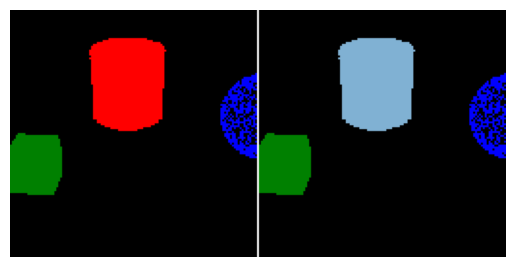

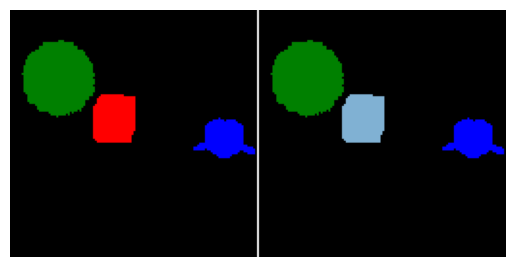

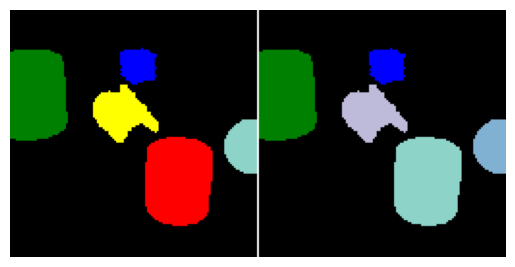

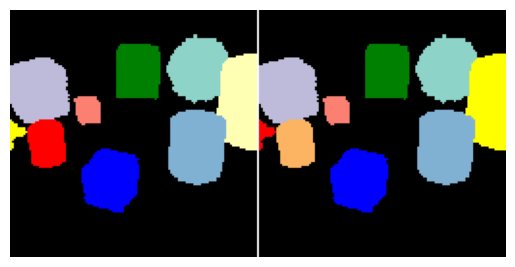

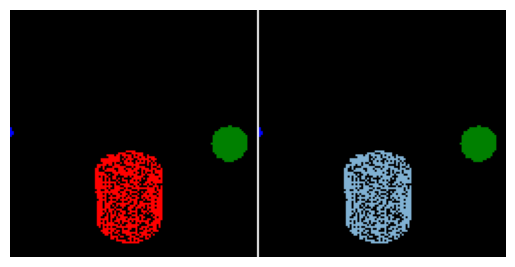

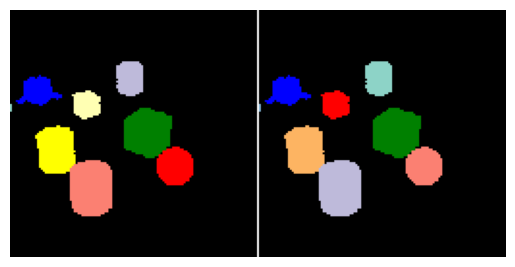

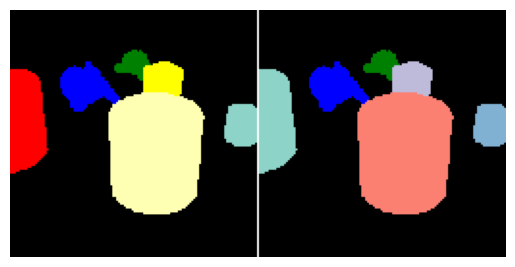

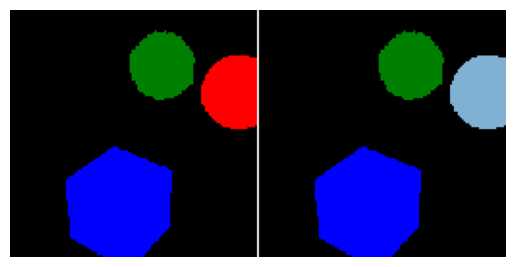

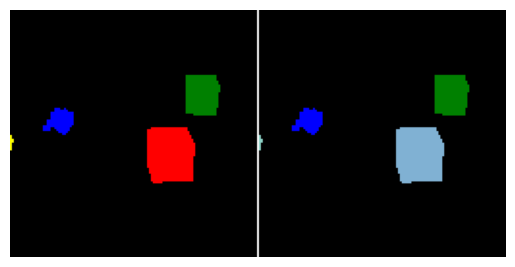

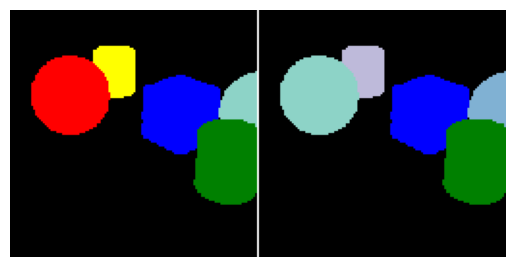

In [3]:
import random 
white_strip = 255 * np.ones((128 , 1 , 3) , dtype = 'uint8')
for _ in range(10):
    idx = random.randint(0 , 9999)
    reconst  = np.zeros((128 , 128 , 3) , dtype = 'uint8')
    for i in range(128):
        for j in range(128):
            reconst[i, j] = idx_to_clr[true_clusters[idx][i , j]]
    plt_img = np.concatenate((true_masks[idx] , white_strip ,  reconst) , axis = 1)
    show_image(plt_img , file = f'cluster_mask_{idx}')